# Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [5]:
pd.read_csv('datasets/train_V2_cleaned.csv')

## Train and test split

shuffling the data

In [6]:
from random import Random
df_shuffle = df.sample(frac=1, random_state=6541)

Splitting the data

In [7]:
from sklearn.model_selection import train_test_split

X = df_shuffle.drop(['outcome_profit'],1)
y = df_shuffle['outcome_profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6541)

## Nearest neighbors

### RNN

In [8]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score

Radius = np.linspace(45,60,15)    # This will give an array of numbers between 1 and 20
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the 11 possible values for the radius (bandwith)
for k in Radius:
    Rnn = RadiusNeighborsRegressor(radius= k)
    scores = cross_val_score(Rnn, X_train, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

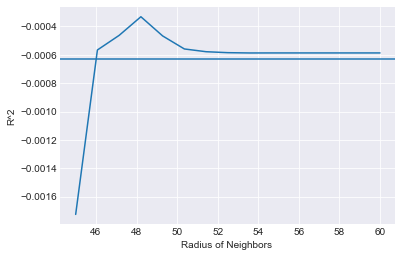

In [9]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(Radius, cv_scores)
plt.xlabel('Radius of Neighbors ')
plt.ylabel('R^2')
plt.axhline(y=max_value-1.96*sd_scores[max_index])

plt.show()

Rnn is useless, it's undefitted with even the lowest radius possible

### KNN

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

K = np.arange(1,100)    
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for k in K:
    knn = KNeighborsRegressor(n_neighbors= k)
    scores = cross_val_score(knn, X_train, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

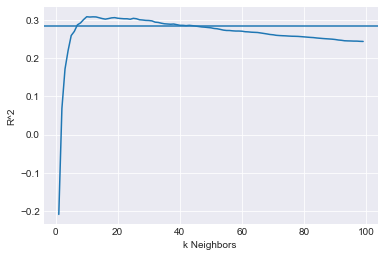

The best k is 10


In [11]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(K, cv_scores)
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')
plt.axhline(y=max_value-1.96*sd_scores[max_index])

plt.show()
print('The best k is', K[max_index])

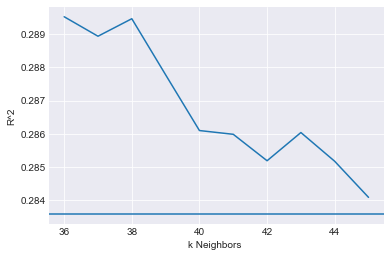

The best k is 10


In [12]:
plt.plot(K[35 : 45],cv_scores[35 : 45])
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')

plt.axhline(y=max_value-1.96*sd_scores[max_index])


plt.show()
print('The best k is', K[max_index])

De beste k is 13, maar 42 is de hoogste dat nog boven de grens ligt, dus we nemen deze.

In [13]:
knn = KNeighborsRegressor(n_neighbors=42)
knn.fit(X_train, y_train)  
print('train value for k=36:',knn.score(X_train, y_train) )
print('test value for k=36:',knn.score(X_test, y_test) )

train value for k=36: 0.3341990132907662
test value for k=36: 0.30684076542307437


### Penalisatie

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly.shape

(4000, 57155)

In [16]:
from sklearn.linear_model import LassoCV
linreg_lassoCV = LassoCV(cv=5, max_iter=10000).fit(X_train_poly, y_train)
print('R2 Training : %.3f' % linreg_lassoCV.score(X_train_poly, y_train))
print('R2 Testing : %.3f' % linreg_lassoCV.score(X_test_poly, y_test))

R2 Training : 0.639
R2 Testing : 0.676


In [ ]:
from sklearn.linear_model import LassoCV
linreg_lassoCV3 = LassoCV(cv=3, max_iter=20000).fit(X_train_poly, y_train)
print('R2 Training : %.3f' % linreg_lassoCV3.score(X_train_poly, y_train))
print('R2 Testing : %.3f' % linreg_lassoCV3.score(X_test_poly, y_test))

In [18]:
import joblib
joblib.dump(linreg_lassoCV, 'pickles/LassoCV_2poly_5fold_10kIter.pkl')

['LassoCV_2poly_5fold_10kIter.pkl']